<a href="https://colab.research.google.com/github/wesleyz/atos-agrupamento/blob/main/unifica_atos_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Script - Agrupamento - Atos Ifes

In [11]:
%matplotlib inline
from IPython.core.display import display, HTML
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_similarity
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

#os.system("git clone https://github.com/wesleyz/atos-agrupamento")

In [12]:
#!pip install --upgrade --quiet gspread
!pip install --upgrade  gspread --quiet
import pandas as pd

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#sh = gc.create('RiUfes-Observacoes')
#help(worksheet.append_row)


worksheet = gc.open('atos_atualizado').worksheets()




def SalvaColabLabel(nameFile, tipo):
  
  #k = worksheet.cell(1,1)
  #cell_list = worksheet.findall("10-560.pdf")
  try:
    cell = worksheet.find(nameFile)
    print("Found something at %s %s" % (cell.row, cell.col))
    worksheet.update_cell(cell.row, 3, tipo)
  except ValueError:
    print('value not found', nameFile)
  #k = worksheet.cell(cell.row,2)

#list_of_lists = worksheet.get_all_values()
#print(list_of_lists)
#dfColab = pd.DataFrame(list_of_lists) #, columns=['document', 'pages', 'type'])
#dfColab['pages'] = pd.to_numeric(dfColab['pages'])
#dfColab['type'] = pd.to_numeric(dfColab['type'])
#dfColab = dfColab.fillna(0)
#SalvaColabLabel('10-4917.pdf',1)


#corpus.filenames[14]
#help(worksheet.range)
#cell_list = worksheet.range('A1:C2')

#import random
#for cell in cell_list:
#  cell.value = random.randint(1, 10)

#worksheet.update_cells()

#  4/wAFCB1VVmxHd6DquOVbZtqtVsnrd4wkOrzWziB4_2WWfw9fNtchd_wE




In [13]:
import os
from tqdm import tqdm


def tem_html(val_lista):
  for i in val_lista:    
    if "html" in i:
      return True  
  return False


links = {}
compilado = []
totais = []
for plan in worksheet:
  links_internos = []
  for valores in plan.get_all_values():   
    
    #valores_temp = valores.copy()     
    if len(valores) == 11 and valores[0] not in  ['CAMPUS','IFES']:

    #totais.append([plan.title,len(valores)])
      compilado.append(valores)
    
    #0 IFES
    #1 TIPOLOGIA DO DOCUMENTO
    #2 Nº	
    #3 ANO
    #4 DATA	
    #5 EMENTA (RESUMO)
    #6 LINK
    #7 EIXO TEMÁTICO
    #8 SITUAÇÃO
    #9 AUTORIDADE/COLEGIADO EMISSOR
    #10 OBSERVAÇÃO
    
    #print(valores[5])
    #temp_v = []    
    #for v in valores:
    #  if len(v) > 0:
    #    print(len(v))
    #    temp_v.append(v)      
    #    if 'http' in v:                
    #      temp_v.append(v)
    #      #print(temp_v)
    #      nome_temp = strip_accents("_".join(temp_v)).replace(" ", "_").replace("-","")
    #      

    #      links_internos.append([nome_temp, v])
          
    
#u = strip_accents(plan.title).replace(" ", "_").replace("-","")        
#links[u]= links_internos
#      #os.system("wget " + v)
#links.keys()

In [14]:
import unicodedata

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [15]:
import os
from tqdm import tqdm


def tem_html(val_lista):
  for i in val_lista:    
    if "html" in i:
      return True  
  return False


links = {}
compilado = []
totais = []
for plan in worksheet:
  links_internos = []
  for valores in plan.get_all_values():   
    #print(len(valores))
    #valores_temp = valores.copy()     
    if len(valores) == 11 and valores[0] not in  ['CAMPUS','IFES']:

    #totais.append([plan.title,len(valores)])
      compilado.append(valores)
    
    #0 IFES
    #1 TIPOLOGIA DO DOCUMENTO
    #2 Nº	
    #3 ANO
    #4 DATA	
    #5 EMENTA (RESUMO)
    #6 LINK
    #7 EIXO TEMÁTICO
    #8 SITUAÇÃO
    #9 AUTORIDADE/COLEGIADO EMISSOR
    #10 OBSERVAÇÃO
    
    #print(valores[5])
    #temp_v = []    
    #for v in valores:
    #  if len(v) > 0:
    #    print(len(v))
    #    temp_v.append(v)      
    #    if 'http' in v:                
    #      temp_v.append(v)
    #      #print(temp_v)
    #      nome_temp = strip_accents("_".join(temp_v)).replace(" ", "_").replace("-","")
    #      

    #      links_internos.append([nome_temp, v])
          
    
#u = strip_accents(plan.title).replace(" ", "_").replace("-","")        
#links[u]= links_internos
#      #os.system("wget " + v)
#links.keys()

In [16]:

campi = []
df_atos  = pd.DataFrame(compilado)
for i in df_atos[0].unique():
  if len(i)>0:
    campi.append(strip_accents(i).lower().replace("-", "").replace(" ", ""))

colunas = ['Campus',
           'TIPOLOGIA DO DOCUMENTO',
           'Nº',
           'ANO',
           'DATA',
           'RESUMO',
           'LINK',
           'EIXO TEMÁTICO',
           'SITUAÇÃO',
           'AUTORIDADE / COLEGIADO EMISSOR',
           'OBSERVAÇÃO']

df_atos.columns = colunas
df_atos.head(2)

,Campus,TIPOLOGIA DO DOCUMENTO,Nº,ANO,DATA,RESUMO,LINK,EIXO TEMÁTICO,SITUAÇÃO,AUTORIDADE / COLEGIADO EMISSOR,OBSERVAÇÃO
0,Reitoria,Resolução,61,2015,18/12/2015,Delega competencia ao Cepe para aprova Codigo ...,https://www.ifes.edu.br/images/stories/files/I...,"I - Administração Geral (infraestrutura, organ...",VIGENTE,CONSUP,Confirmar se é Consup – verificar o eixo
1,Reitoria,Resolução,61,2019,13/12/2019,Institui a Comissão Permanente de Verificação ...,https://ifes.edu.br/images/stories/Res_CS_61_2...,"I - Administração Geral (infraestrutura, organ...",VIGENTE,REITOR,


In [17]:
os.system("mkdir atos_pdf")

for direc in worksheet:
  nome = direc.title.replace("-", "").replace(" ", "")  
  nome = strip_accents(nome).lower()

  os.system("mkdir ./atos_pdf/"+nome)

In [18]:

df_atos['Campus'].unique()

array(['Reitoria', 'Alegre', 'Aracruz', 'Barra de São Francisco',
       'Cariacica', 'Cachoeiro de Itapemirim', 'Colatina',
       'Centro-Serrano', 'Guarapari', 'Ibatiba', 'Itapina', 'Linhares',
       'Montanha', 'Nova Venécia', 'Polo de Inovação', 'Piúma',
       'São Mateus', 'Santa Terresa', 'Serra', 'Venda Nova do Imigrante',
       'Viana', 'Vila Velha', 'Vitória'], dtype=object)

In [19]:
colunas_ = ['Campus',
           'TIPOLOGIA DO DOCUMENTO',
           'Nº',
           'ANO',
           'DATA',
           'RESUMO',
           'LINK',
           'EIXO TEMÁTICO',
           'SITUAÇÃO',
           'AUTORIDADE / COLEGIADO EMISSOR',
           'OBSERVAÇÃO']

#atos = pd.read_csv("./atos-agrupamento/compilado-atos_.csv", sep=';')
#atos.columns=colunas_

documents = df_atos['RESUMO'].values.astype('U')

In [20]:
#data = [dict(name='Google', url='http://www.google.com'),
#        dict(name='Stackoverflow', url='http://stackoverflow.com')]
#df = pd.DataFrame(data)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, 'Link')

In [21]:
#documents = corpus.data 




def vetoriza_texto(texto, ngram=(1,1),feats=100):
    vectorizer =  TfidfVectorizer(ngram_range=ngram,
                                  lowercase=True,
                                  max_features=feats) # TfidfVectorizer(stop_words='english')
    return vectorizer.fit_transform(texto)


def clusteriza(X, title='Cluster', dimensao=(5,50)):
    #plt.plot(figsize=(10,18.16))
    model = KElbowVisualizer(KMeans(), k=dimensao, timings=False, locate_elbow=True)
    model.fit(X.toarray())    
        
    plt.legend()
    plt.title(title)  
    plt.show()
    #return [model.elbow_score_,model.elbow_value_]
            

           
        
           


# Processamento do Agrupamento - Modo 1

In [40]:
#@title Hyper Params Clusterization
#@markdown Forms support many types of fields.
min_n_clusters = 5 #@param {type:"slider", min:2, max:40, step:1}
max_n_clusters = 70 #@param {type:"slider", min:26, max:70, step:1}
n_grams = 7 #@param {type:"slider", min:1, max:80, step:1}
n_features = 51 #@param {type:"slider", min:1, max:1001, step:50}
#@markdown ---

pn = (2,int(n_grams))
n_word = n_features
X = vetoriza_texto(documents, ngram=pn, feats=n_word)
range_n_clusters = list(range(min_n_clusters,max_n_clusters))
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

KeyboardInterrupt: ignored

# Processamento do Agrupamento - Modo 2

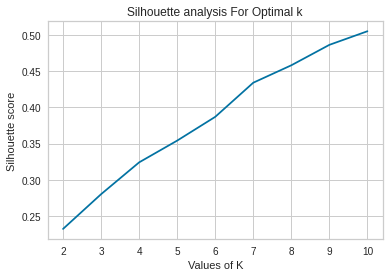

In [ ]:
#@title Hyper Params Clusterization
#@markdown Forms support many types of fields.
input_n_clusters = 11 #@param {type:"slider", min:2, max:80, step:1}
n_grams = 7 #@param {type:"slider", min:1, max:10, step:1}
n_features = 51 #@param {type:"slider", min:1, max:1001, step:50}
#@markdown ---
pn = (2,int(n_grams))
n_word = n_features
X = vetoriza_texto(documents, ngram=pn, feats=n_word)
range_n_clusters = list(range(2,int(input_n_clusters)))
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 cluster_labels = kmeans.labels_ 
 # silhouette score
 silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Vetorização do Texto

In [23]:
#@title Hyper Params Vectorization
#@markdown Forms support many types of fields.



n_grams = 7 #@param {type:"slider", min:2, max:10, step:1}
n_features = 51 #@param {type:"slider", min:1, max:1001, step:50}
n_rank = 20 #@param {type:"slider", min:5, max:50, step:5}

#@markdown ---


pn = (2,int(n_grams))
n_word = n_features

vectorizer =  TfidfVectorizer(ngram_range=pn,
                                  lowercase=True,
                                  max_features=n_features) # TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)



df_vocabulario = pd.DataFrame(vectorizer.vocabulary_, index=[0]).T.reset_index()
df_vocabulario.columns=['termo', 'frequencia']
df_vocabulario = df_vocabulario.sort_values(by='frequencia', ascending=False)



# Top Features

In [24]:
df_vocabulario.head(n_rank)

,termo,frequencia
29,técnico em,50
17,santa teresa,49
22,resolução cs nº,48
19,resolução cs,47
14,regimento interno do,46
11,regimento interno,45
10,pós graduação,44
38,oferta do curso técnico em,43
35,oferta do curso técnico,42
31,oferta do curso,41


# Tail Features

In [ ]:
df_vocabulario.tail(n_rank)

,termo,frequencia
15,do conselho de,19
13,do conselho,18
16,do campus,17
24,dispõe sobre,16
33,curso técnico em,15
28,curso técnico,14
41,curso de,13
20,cs nº,12
9,conselho de,11
39,autorizar oferta do curso técnico em,10


# Agrupamento

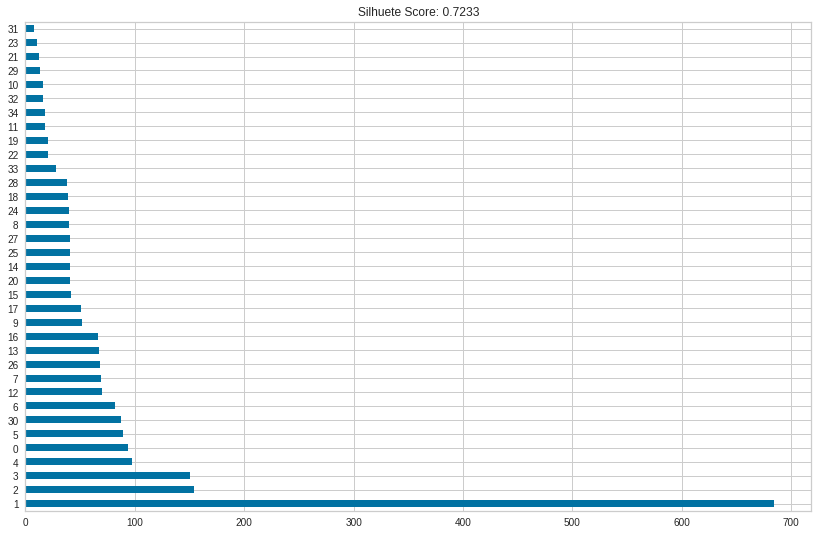

In [27]:
#@markdown ---

k_grupos = 35 #@param {type:"slider", min:5, max:50, step:1}

#@markdown ---


kmeans = KMeans(n_clusters=k_grupos)
kmeans.fit(X)
cluster_labels = kmeans.labels_
df_atos['cluster'] = cluster_labels
import seaborn as sea

sc = round(silhouette_score(X, cluster_labels),4)
df_atos['cluster'].value_counts().plot(kind='barh', title="Silhuete Score: "+str(sc), figsize=(14.08,9))
plt.show()





/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


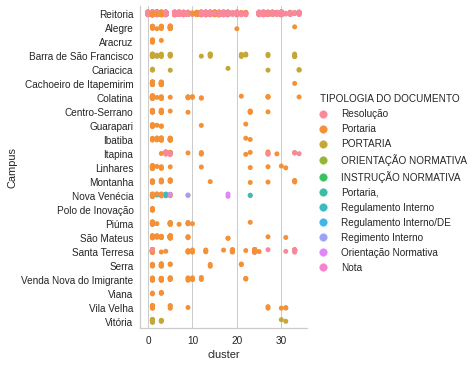

In [29]:

sea.catplot(data=df_atos, hue='TIPOLOGIA DO DOCUMENTO', x='cluster', y='Campus', ax=ax)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


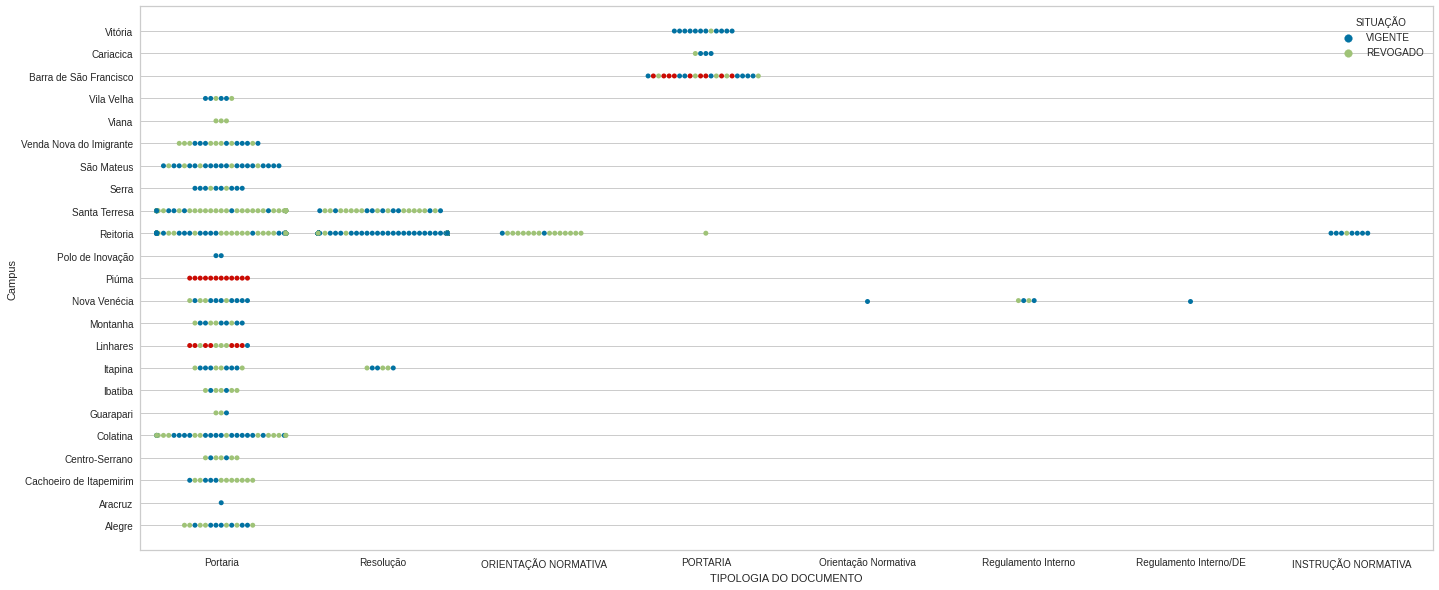

In [43]:
fig, ax = plt.subplots(figsize=(23.16,10))

sea.swarmplot(data=df_atos.sample(1000), hue='SITUAÇÃO', x='TIPOLOGIA DO DOCUMENTO', y='Campus', ax=ax)




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


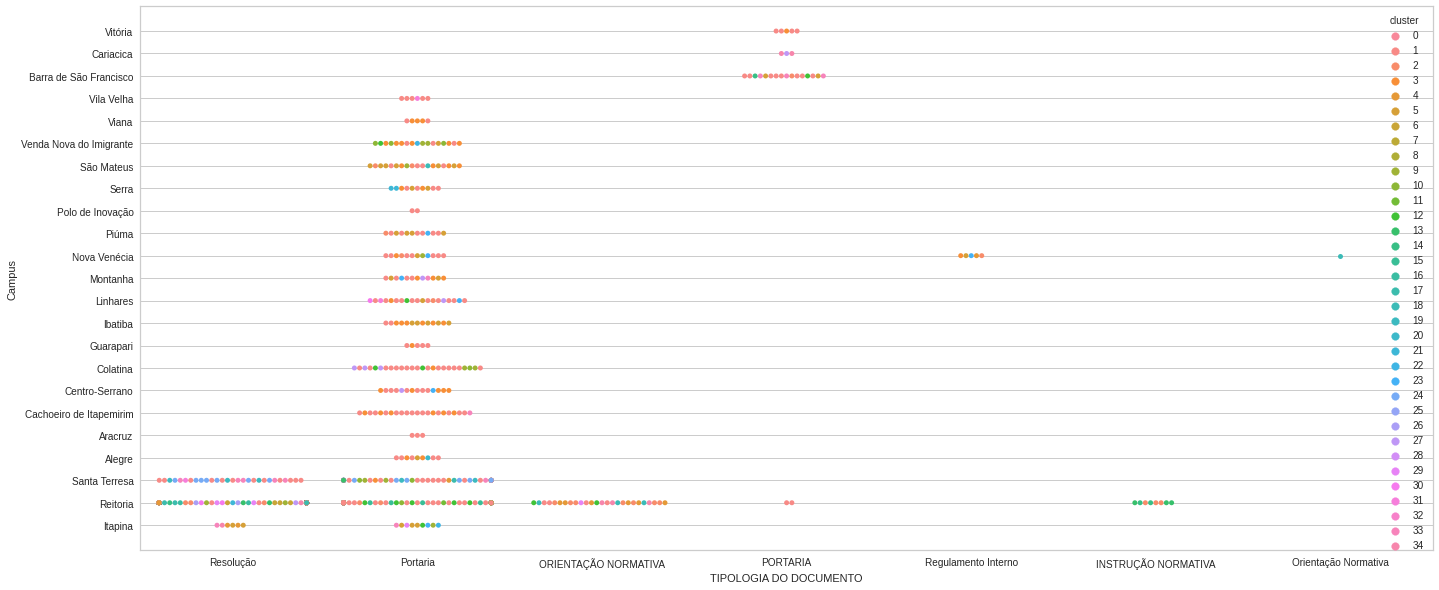

In [46]:
fig, ax = plt.subplots(figsize=(23.16,10))
sea.swarmplot(data=df_atos.sample(1000), hue='cluster', x='TIPOLOGIA DO DOCUMENTO', y='Campus', ax=ax)



In [31]:
df_atos['Campus_cat'] = df_atos.Campus.astype('category')
df_atos['Campus_cat'] = df_atos['Campus_cat'].cat.codes
df_atos['tip_cat'] = df_atos['TIPOLOGIA DO DOCUMENTO'].astype('category')
df_atos['tip_cat'] = df_atos['tip_cat'].cat.codes
df_atos['sit_cat'] = df_atos['SITUAÇÃO'].astype('category')
df_atos['sit_cat'] = df_atos['sit_cat'].cat.codes

In [47]:
#@markdown ---
ordernar = "cluster" #@param ["cluster", "Campus", "ANO", "RESUMO"]
#@markdown ---

df_atos = df_atos.sort_values(by=ordernar)


df_atos[['Campus','TIPOLOGIA DO DOCUMENTO','ANO','SITUAÇÃO','RESUMO',  'cluster','LINK']].style.format({'LINK': make_clickable})

,Campus,TIPOLOGIA DO DOCUMENTO,ANO,SITUAÇÃO,RESUMO,cluster,LINK
1243,Reitoria,Resolução,2016,VIGENTE,"Autorizar a oferta do Curso Técnico em Guia de Turismo do Campus Vitória, eixo tecnológico Turismo, Hospitalidade e Lazer, integrado ao Ensino Médio EJA",0,Link
1301,Reitoria,Resolução,2018,VIGENTE,"Autorizar a oferta do Curso Técnico em Química do Campus Vila Velha, eixo tecnológico Produção Industrial, integrado ao Ensino Médio",0,Link
1291,Reitoria,Resolução,2018,VIGENTE,"Autorizar a oferta do Curso Técnico em Administração do campus Centro-Serrano, eixo tecnológico Gestão e Negócios, integrado ao Ensino Médio",0,Link
1258,Reitoria,Resolução,2016,REVOGADO,"Autorizar a oferta do Curso Técnico em Agroindústria do Campus Venda Nova do Imigrante, eixo tecnológico Produção Alimentícia, integrado ao Ensino Médio",0,Link
1257,Reitoria,Resolução,2016,REVOGADO,"Autorizar a oferta do Curso Técnico em Administração do Campus Venda Nova do Imigrante, eixo tecnológico Gestão e Negócios, integrado ao Ensino Médi",0,Link
1256,Reitoria,Resolução,2016,REVOGADO,"Autorizar a oferta do Curso Técnico em Portos do Campus Cariacica, eixo tecnológico Infraestrutura, integrado ao Ensino Médio.",0,Link
356,Reitoria,Resolução,2016,VIGENTE,"Autorizar a oferta do Curso Técnico em Química do Campus Aracruz, eixo tecnológico Produção Industrial, Integrado ao Ensino Médio.",0,Link
1234,Reitoria,Resolução,2016,VIGENTE,"Autorizar a oferta do Curso Técnico em Estradas do Campus Vitória, eixo tecnológico Infraestrutura, integrado ao Ensino Médio.",0,Link
1248,Reitoria,Resolução,2016,VIGENTE,"Autorizar a oferta do Curso Técnico em Zootecnia do Campus Itapina, eixo tecnológico Recursos Naturais, integrado ao Ensino Médio.",0,Link
1222,Reitoria,Resolução,2016,REVOGADO,"Autorizar a oferta do Curso Técnico em Agroindústria do Campus Santa Teresa, eixo tecnológico Produção Alimentícia, integrado ao Ensino Médio.",0,Link


In [38]:
df_atos.to_csv("cluster_09092021.csv", sep=';')